## Problem Statement

To predict the generation of power of the given plan in this duration: October 1st, 2019 to October 27th, 2019. 

#### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
power_actual = pd.read_csv("power_actual.csv") 
power_actual.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [3]:
weather_actuals = pd.read_csv("weather_actuals.csv")
weather_actuals.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [4]:
weather_forecast = pd.read_csv("weather_forecast.csv")
weather_forecast.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [5]:
power_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  70080 non-null  int64  
 1   datetime    70080 non-null  object 
 2   ghi         35040 non-null  float64
 3   gti         35040 non-null  float64
 4   power       70080 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ MB


In [6]:
weather_actuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            13619 non-null  int64  
 1   plant_id              13619 non-null  int64  
 2   datetime_utc          13619 non-null  object 
 3   datetime_local        13619 non-null  object 
 4   cloud_cover           13619 non-null  float64
 5   apparent_temperature  13619 non-null  float64
 6   temperature           13619 non-null  int64  
 7   humidity              13619 non-null  int64  
 8   dew_point             13619 non-null  float64
 9   wind_bearing          13619 non-null  int64  
 10  wind_speed            13619 non-null  float64
 11  wind_chill            3744 non-null   float64
 12  wind_gust             13619 non-null  float64
 13  heat_index            3744 non-null   float64
 14  pressure              13619 non-null  float64
 15  qpf                

In [7]:
weather_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            648 non-null    int64  
 1   plant_id              648 non-null    int64  
 2   datetime_utc          648 non-null    object 
 3   datetime_local        648 non-null    object 
 4   cloud_cover           648 non-null    float64
 5   apparent_temperature  648 non-null    float64
 6   temperature           648 non-null    int64  
 7   humidity              648 non-null    int64  
 8   dew_point             648 non-null    float64
 9   wind_bearing          648 non-null    int64  
 10  wind_speed            648 non-null    float64
 11  wind_chill            0 non-null      float64
 12  wind_gust             648 non-null    float64
 13  heat_index            0 non-null      float64
 14  pressure              648 non-null    float64
 15  qpf                   0

In [8]:
power_actual.shape

(70080, 5)

In [9]:
weather_actuals.shape

(13619, 31)

In [10]:
weather_forecast.shape

(648, 31)

### Handelling the Null Values

Checking the missing data in the dataset of power_actual

In [11]:
total = power_actual.isnull().sum().sort_values(ascending=False)
total

gti           35040
ghi           35040
power             0
datetime          0
Unnamed: 0        0
dtype: int64

In [12]:
percentage = (power_actual.isnull().sum()/power_actual.isnull().count()).sort_values(ascending=False)
percentage

gti           0.5
ghi           0.5
power         0.0
datetime      0.0
Unnamed: 0    0.0
dtype: float64

In [13]:
power_actual.nunique()

Unnamed: 0    70080
datetime      70080
ghi               1
gti               1
power          2171
dtype: int64

We can observe that  ghi & gti column has only 1 unique value therefore we can drop it

In [14]:
power_actual = power_actual.drop(['ghi','gti','Unnamed: 0'],axis=1)  # Also Unnamed is usless for us

In [15]:
power_actual.head()

,datetime,power
0,2017-10-01 00:00:00,0.0
1,2017-10-01 00:15:00,0.0
2,2017-10-01 00:30:00,0.0
3,2017-10-01 00:45:00,0.0
4,2017-10-01 01:00:00,0.0


Checking the missing data in the dataset of weather_actuals

In [16]:
total = weather_actuals.isnull().sum().sort_values(ascending=False)
total

qpf                     9875
wind_chill              9875
snow                    9875
pop                     9875
fctcode                 9875
precip_accumulation     9875
heat_index              9875
precip_type             7129
apparent_temperature       0
temperature                0
cloud_cover                0
humidity                   0
datetime_local             0
datetime_utc               0
plant_id                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
updated_at                 0
wind_gust                  0
pressure                   0
summary                    0
uv_index                   0
ozone                      0
precip_intensity           0
precip_probability         0
visibility                 0
sunrise                    0
sunset                     0
icon                       0
Unnamed: 0                 0
dtype: int64

In [17]:
percentage = (weather_actuals.isnull().sum()/weather_actuals.isnull().count()).sort_values(ascending=False)
percentage

qpf                     0.72509
wind_chill              0.72509
snow                    0.72509
pop                     0.72509
fctcode                 0.72509
precip_accumulation     0.72509
heat_index              0.72509
precip_type             0.52346
apparent_temperature    0.00000
temperature             0.00000
cloud_cover             0.00000
humidity                0.00000
datetime_local          0.00000
datetime_utc            0.00000
plant_id                0.00000
dew_point               0.00000
wind_bearing            0.00000
wind_speed              0.00000
updated_at              0.00000
wind_gust               0.00000
pressure                0.00000
summary                 0.00000
uv_index                0.00000
ozone                   0.00000
precip_intensity        0.00000
precip_probability      0.00000
visibility              0.00000
sunrise                 0.00000
sunset                  0.00000
icon                    0.00000
Unnamed: 0              0.00000
dtype: f

In [18]:
weather_actuals.nunique()

Unnamed: 0              13619
plant_id                    1
datetime_utc            13619
datetime_local          13619
cloud_cover               102
apparent_temperature     3808
temperature                43
humidity                    2
dew_point                3432
wind_bearing              361
wind_speed                699
wind_chill                  1
wind_gust                1067
heat_index                  1
pressure                 2919
qpf                         1
uv_index                   14
snow                        1
pop                         1
fctcode                     1
ozone                    1262
precip_accumulation         1
precip_intensity          180
precip_probability         66
precip_type                 2
visibility                446
sunrise                   568
sunset                    568
icon                        8
summary                    19
updated_at                406
dtype: int64

In [19]:
weather_actuals.drop(['plant_id','precip_type','precip_accumulation','heat_index','qpf','snow','pop','fctcode','wind_chill','Unnamed: 0','updated_at','summary'],axis=1, inplace=True)
weather_actuals

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon
0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.00,26.52,26,1,19.46,308,0.83,-9999.00,1007.90,-9999,-9999.0,-9999.0,-9999.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night
1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.00,28.78,27,1,20.06,-9999,-9999.00,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
2,2017-09-30 20:30:00,2017-10-01 02:00:00,0.00,26.58,26,1,19.97,-9999,-9999.00,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
3,2017-09-30 21:30:00,2017-10-01 03:00:00,0.00,23.84,23,1,18.66,270,0.45,-9999.00,1008.12,-9999,-9999.0,-9999.0,-9999.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night
4,2017-09-30 22:30:00,2017-10-01 04:00:00,0.00,24.13,24,1,17.84,-9999,-9999.00,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,2019-09-30 13:30:00,2019-09-30 19:00:00,0.16,31.66,29,1,21.19,40,2.72,4.59,1007.44,0,269.6,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13615,2019-09-30 14:30:00,2019-09-30 20:00:00,0.16,30.42,28,1,21.35,59,3.24,5.45,1008.25,0,268.7,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13616,2019-09-30 15:30:00,2019-09-30 21:00:00,0.18,29.56,27,1,21.61,76,3.34,5.83,1008.65,0,268.4,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13617,2019-09-30 16:30:00,2019-09-30 22:00:00,0.30,28.97,27,1,21.99,88,3.22,5.73,1008.76,0,268.7,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night


Checking the missing data in the dataset of weather_forecast

In [20]:
total = weather_forecast.isnull().sum().sort_values(ascending=False)
total

qpf                     648
wind_chill              648
snow                    648
pop                     648
fctcode                 648
precip_accumulation     648
heat_index              648
precip_type             534
apparent_temperature      0
temperature               0
cloud_cover               0
humidity                  0
datetime_local            0
datetime_utc              0
plant_id                  0
dew_point                 0
wind_bearing              0
wind_speed                0
updated_at                0
wind_gust                 0
pressure                  0
summary                   0
uv_index                  0
ozone                     0
precip_intensity          0
precip_probability        0
visibility                0
sunrise                   0
sunset                    0
icon                      0
Unnamed: 0                0
dtype: int64

In [21]:
percentage = (weather_forecast.isnull().sum()/weather_forecast.isnull().count()).sort_values(ascending=False)
percentage

qpf                     1.000000
wind_chill              1.000000
snow                    1.000000
pop                     1.000000
fctcode                 1.000000
precip_accumulation     1.000000
heat_index              1.000000
precip_type             0.824074
apparent_temperature    0.000000
temperature             0.000000
cloud_cover             0.000000
humidity                0.000000
datetime_local          0.000000
datetime_utc            0.000000
plant_id                0.000000
dew_point               0.000000
wind_bearing            0.000000
wind_speed              0.000000
updated_at              0.000000
wind_gust               0.000000
pressure                0.000000
summary                 0.000000
uv_index                0.000000
ozone                   0.000000
precip_intensity        0.000000
precip_probability      0.000000
visibility              0.000000
sunrise                 0.000000
sunset                  0.000000
icon                    0.000000
Unnamed: 0

In [22]:
weather_forecast.nunique()

Unnamed: 0              648
plant_id                  1
datetime_utc            648
datetime_local          648
cloud_cover              86
apparent_temperature    529
temperature              19
humidity                  2
dew_point               508
wind_bearing            240
wind_speed              258
wind_chill                0
wind_gust               351
heat_index                0
pressure                434
qpf                       0
uv_index                  9
snow                      0
pop                       0
fctcode                   0
ozone                   139
precip_accumulation       0
precip_intensity         15
precip_probability        7
precip_type               1
visibility                1
sunrise                  27
sunset                   27
icon                      5
summary                   5
updated_at               27
dtype: int64

In [23]:
weather_forecast.drop(['plant_id','precip_type','precip_accumulation','heat_index','qpf','snow','pop','fctcode','wind_chill','Unnamed: 0','updated_at','summary'],axis=1, inplace=True)
weather_forecast

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon
0,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night
1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night
2,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night
3,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night
4,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2019-10-27 13:30:00,2019-10-27 19:00:00,0.00,27.23,27,0,12.20,345,1.74,2.85,1011.70,0,264.9,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night
644,2019-10-27 14:30:00,2019-10-27 20:00:00,0.00,25.23,25,0,12.06,353,1.39,2.73,1012.28,0,264.9,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night
645,2019-10-27 15:30:00,2019-10-27 21:00:00,0.00,23.75,24,0,12.19,29,1.15,2.55,1012.67,0,264.6,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night
646,2019-10-27 16:30:00,2019-10-27 22:00:00,0.00,22.86,23,1,12.50,92,1.03,2.33,1012.79,0,264.3,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night


### We will mearge two DataFrames - Actual_weather & Actual_Power 

The "datetime" column in "Actual_power" dataset & "datetime_local" column in "Actual_weather" dataset are same. so we are joining two datasets on the bais of these two features

In [24]:
train_data = pd.merge(power_actual, weather_actuals,  how='inner', left_on=['datetime'], right_on = ['datetime_local'])

In [25]:
train_data

,datetime,power,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon
0,2017-10-01 00:00:00,0.0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.00,26.52,26,1,19.46,308,...,-9999.00,1007.90,-9999,-9999.0,-9999.0,-9999.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night
1,2017-10-01 01:00:00,0.0,2017-09-30 19:30:00,2017-10-01 01:00:00,0.00,28.78,27,1,20.06,-9999,...,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
2,2017-10-01 02:00:00,0.0,2017-09-30 20:30:00,2017-10-01 02:00:00,0.00,26.58,26,1,19.97,-9999,...,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
3,2017-10-01 03:00:00,0.0,2017-09-30 21:30:00,2017-10-01 03:00:00,0.00,23.84,23,1,18.66,270,...,-9999.00,1008.12,-9999,-9999.0,-9999.0,-9999.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night
4,2017-10-01 04:00:00,0.0,2017-09-30 22:30:00,2017-10-01 04:00:00,0.00,24.13,24,1,17.84,-9999,...,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,2019-09-30 19:00:00,0.0,2019-09-30 13:30:00,2019-09-30 19:00:00,0.16,31.66,29,1,21.19,40,...,4.59,1007.44,0,269.6,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13615,2019-09-30 20:00:00,0.0,2019-09-30 14:30:00,2019-09-30 20:00:00,0.16,30.42,28,1,21.35,59,...,5.45,1008.25,0,268.7,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13616,2019-09-30 21:00:00,0.0,2019-09-30 15:30:00,2019-09-30 21:00:00,0.18,29.56,27,1,21.61,76,...,5.83,1008.65,0,268.4,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13617,2019-09-30 22:00:00,0.0,2019-09-30 16:30:00,2019-09-30 22:00:00,0.30,28.97,27,1,21.99,88,...,5.73,1008.76,0,268.7,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night


To handle the Null values in this dataset

In [26]:
train_data.isnull().sum()

datetime                0
power                   0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
dtype: int64

we will concider Universal datetime i.e datetime_utc to avaoid confusion

In [27]:
train_data.drop(['datetime','datetime_local'],axis=1, inplace=True)

In [28]:
train_data.shape

(13619, 19)

## Feature engineering

In [29]:
train_data[['apparent_temperature','temperature']].head()

,apparent_temperature,temperature
0,26.52,26
1,28.78,27
2,26.58,26
3,23.84,23
4,24.13,24


Both "apparent_temp" & "temperature" are having approximately same values therefore wewill go with "temperature" only.

In [30]:
train_data.drop(['apparent_temperature'],axis=1, inplace=True)

In [31]:
train_data.columns

Index(['power', 'datetime_utc', 'cloud_cover', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'sunrise', 'sunset', 'icon'],
      dtype='object')

In [32]:
train_data

,power,datetime_utc,cloud_cover,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon
0,0.0,2017-09-30 18:30:00,0.00,26,1,19.46,308,0.83,-9999.00,1007.90,-9999,-9999.0,-9999.0,-9999.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night
1,0.0,2017-09-30 19:30:00,0.00,27,1,20.06,-9999,-9999.00,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
2,0.0,2017-09-30 20:30:00,0.00,26,1,19.97,-9999,-9999.00,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
3,0.0,2017-09-30 21:30:00,0.00,23,1,18.66,270,0.45,-9999.00,1008.12,-9999,-9999.0,-9999.0,-9999.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night
4,0.0,2017-09-30 22:30:00,0.00,24,1,17.84,-9999,-9999.00,-9999.00,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,0.0,2019-09-30 13:30:00,0.16,29,1,21.19,40,2.72,4.59,1007.44,0,269.6,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13615,0.0,2019-09-30 14:30:00,0.16,28,1,21.35,59,3.24,5.45,1008.25,0,268.7,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13616,0.0,2019-09-30 15:30:00,0.18,27,1,21.61,76,3.34,5.83,1008.65,0,268.4,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night
13617,0.0,2019-09-30 16:30:00,0.30,27,1,21.99,88,3.22,5.73,1008.76,0,268.7,0.0,0.0,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night


In [33]:
train_data.describe()

,power,cloud_cover,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
count,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,35.255627,-314.005310,24.498054,0.537411,11.924626,-498.677363,-540.808704,-2393.184251,-733.594065,-2394.989280,-2187.730797,-2396.367775,-2396.398081,-117.086149
std,557.059759,1744.610028,8.840016,0.498617,9.129459,2557.943872,2267.247300,4270.333680,4018.429107,4269.320576,4385.706548,4268.545854,4268.528833,1130.763316
min,0.000000,-9999.000000,5.000000,0.000000,-20.560000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,0.000000,17.000000,0.000000,5.920000,79.000000,1.620000,1.185000,998.750000,0.000000,236.900000,0.000000,0.000000,3.540000
50%,0.000000,0.000000,25.000000,1.000000,10.710000,149.000000,2.410000,3.070000,1006.900000,0.000000,270.800000,0.000000,0.000000,16.090000
75%,5.810000,0.410000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000
max,15504.750000,1.000000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000


In [34]:
train_data.dtypes

power                 float64
datetime_utc           object
cloud_cover           float64
temperature             int64
humidity                int64
dew_point             float64
wind_bearing            int64
wind_speed            float64
wind_gust             float64
pressure              float64
uv_index                int64
ozone                 float64
precip_intensity      float64
precip_probability    float64
visibility            float64
sunrise                object
sunset                 object
icon                   object
dtype: object

## Formatting Datetime


In [35]:
train_data[['datetime_utc','sunrise','sunset']].head()

,datetime_utc,sunrise,sunset
0,2017-09-30 18:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
1,2017-09-30 19:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
2,2017-09-30 20:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
3,2017-09-30 21:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
4,2017-09-30 22:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07


In [36]:
train_data['datetime_utc'] = train_data['datetime_utc'].astype(str)
train_data['sunrise'] = train_data['sunrise'].astype(str)
train_data['sunset'] = train_data['sunset'].astype(str)

In [37]:
train_data['datetime_utc'] = pd.to_datetime(train_data['datetime_utc'],dayfirst=True)
train_data['sunrise'] = pd.to_datetime(train_data['sunrise'],dayfirst=True)
train_data['sunset'] = pd.to_datetime(train_data['sunset'],dayfirst=True)

In [38]:
train_data[['datetime_utc','sunrise','sunset']].head()

,datetime_utc,sunrise,sunset
0,2017-09-30 18:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
1,2017-09-30 19:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
2,2017-09-30 20:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
3,2017-09-30 21:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
4,2017-09-30 22:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07


In [39]:
train_data.dtypes

power                        float64
datetime_utc          datetime64[ns]
cloud_cover                  float64
temperature                    int64
humidity                       int64
dew_point                    float64
wind_bearing                   int64
wind_speed                   float64
wind_gust                    float64
pressure                     float64
uv_index                       int64
ozone                        float64
precip_intensity             float64
precip_probability           float64
visibility                   float64
sunrise               datetime64[ns]
sunset                datetime64[ns]
icon                          object
dtype: object

In [40]:
weather_forecast['datetime_utc'] = weather_forecast['datetime_utc'].astype(str)
weather_forecast['datetime_utc'] = pd.to_datetime(weather_forecast['datetime_utc'],dayfirst=True)
weather_forecast['sunrise'] = weather_forecast['sunrise'].astype(str)
weather_forecast['sunrise'] = pd.to_datetime(weather_forecast['sunrise'],dayfirst=True)
weather_forecast['sunset'] = weather_forecast['sunset'].astype(str)
weather_forecast['sunset'] = pd.to_datetime(weather_forecast['sunset'],dayfirst=True)

In [41]:
weather_forecast[['datetime_utc','sunrise','sunset']].head()

,datetime_utc,sunrise,sunset
0,2019-09-30 18:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
1,2019-09-30 19:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
2,2019-09-30 20:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
3,2019-09-30 21:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
4,2019-09-30 22:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42


To calculate how many hours we are getting sunlight per day & how much power we can generate perday; We are extracting the hours column for respective date as a seperate column. Because we can observe in above datetime, minutes and seconds are constant 

In [42]:
train_data['dtUTC_hour'] = train_data['datetime_utc'].dt.hour

In [43]:
train_data[['dtUTC_hour','datetime_utc']].head()

,dtUTC_hour,datetime_utc
0,18,2017-09-30 18:30:00
1,19,2017-09-30 19:30:00
2,20,2017-09-30 20:30:00
3,21,2017-09-30 21:30:00
4,22,2017-09-30 22:30:00


In [44]:
train_data['SR_hour'] = train_data['sunrise'].dt.hour
train_data['SS_hour'] = train_data['sunset'].dt.hour

In [45]:
weather_forecast['dtUTC_hour'] = weather_forecast['datetime_utc'].dt.hour
weather_forecast['SR_hour'] = weather_forecast['sunrise'].dt.hour
weather_forecast['SS_hour'] = weather_forecast['sunset'].dt.hour

In [46]:
train_data[['dtUTC_hour','SR_hour','SS_hour']].head()

,dtUTC_hour,SR_hour,SS_hour
0,18,0,12
1,19,0,12
2,20,0,12
3,21,0,12
4,22,0,12


In [47]:
weather_forecast[['dtUTC_hour','SR_hour','SS_hour']].head()

,dtUTC_hour,SR_hour,SS_hour
0,18,0,12
1,19,0,12
2,20,0,12
3,21,0,12
4,22,0,12


In [48]:
train_data['sunlight_hours']= train_data['SS_hour'] - train_data['SR_hour']
train_data['sunlight_hours'].head()

0    12
1    12
2    12
3    12
4    12
Name: sunlight_hours, dtype: int64

In [49]:
weather_forecast['sunlight_hours']= weather_forecast['SS_hour'] - weather_forecast['SR_hour']
weather_forecast['sunlight_hours'].head()

0    12
1    12
2    12
3    12
4    12
Name: sunlight_hours, dtype: int64

In [50]:
train_data['exposure_duration'] = train_data['dtUTC_hour'] -  train_data['SR_hour']
train_data['exposure_duration'].head()

0    18
1    19
2    20
3    21
4    22
Name: exposure_duration, dtype: int64

We have extracted the required information out of these columns (the hour factor) , thereofre we are  dropping the date time columns

In [51]:
train_data.drop(['sunrise','sunset'] ,axis=1 , inplace=True)
train_data.drop(['datetime_utc'] ,axis=1 , inplace=True)

In [52]:
train_data.shape

(13619, 20)

In [53]:
weather_forecast.shape

(648, 23)

In [54]:
weather_forecast.drop(['datetime_local','datetime_utc','sunrise','sunset','temperature'] ,axis=1 , inplace=True)

In [55]:
weather_forecast.shape

(648, 18)

In [56]:
train_data.columns

Index(['power', 'cloud_cover', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility', 'icon',
       'dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours',
       'exposure_duration'],
      dtype='object')

## Handlelling Outliers

We will remove outliers here

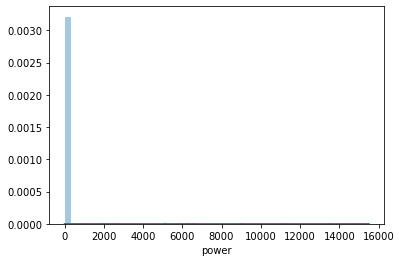

In [57]:
sns.distplot(train_data['power'], hist= True)

In [58]:
pd.get_dummies(train_data)

,power,cloud_cover,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,sunlight_hours,exposure_duration,icon_clear-day,icon_clear-night,icon_cloudy,icon_fog,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_wind
0,0.0,0.00,26,1,19.46,308,0.83,-9999.00,1007.90,-9999,...,12,18,0,1,0,0,0,0,0,0
1,0.0,0.00,27,1,20.06,-9999,-9999.00,-9999.00,-9999.00,-9999,...,12,19,0,0,0,1,0,0,0,0
2,0.0,0.00,26,1,19.97,-9999,-9999.00,-9999.00,-9999.00,-9999,...,12,20,0,0,0,1,0,0,0,0
3,0.0,0.00,23,1,18.66,270,0.45,-9999.00,1008.12,-9999,...,12,21,0,1,0,0,0,0,0,0
4,0.0,0.00,24,1,17.84,-9999,-9999.00,-9999.00,-9999.00,-9999,...,12,22,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,0.0,0.16,29,1,21.19,40,2.72,4.59,1007.44,0,...,12,13,0,0,0,0,0,1,0,0
13615,0.0,0.16,28,1,21.35,59,3.24,5.45,1008.25,0,...,12,14,0,0,0,0,0,1,0,0
13616,0.0,0.18,27,1,21.61,76,3.34,5.83,1008.65,0,...,12,15,0,0,0,0,0,1,0,0
13617,0.0,0.30,27,1,21.99,88,3.22,5.73,1008.76,0,...,12,16,0,0,0,0,0,1,0,0


In [59]:
train_data.power.describe(percentiles=[0.75,0.80,0.85,0.90,0.95,0.99,0.992,0.994,0.996,0.998,0.999])

count    13619.000000
mean        35.255627
std        557.059759
min          0.000000
50%          0.000000
75%          5.810000
80%          8.310000
85%         10.650000
90%         12.470000
95%         14.001000
99%         16.168200
99.2%       16.610560
99.4%       17.145840
99.6%     1823.596160
99.8%     7590.228120
99.9%    11044.371300
max      15504.750000
Name: power, dtype: float64

In [60]:
train_data.loc[(train_data['power'] >= 5.81)]

,power,cloud_cover,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,icon,dtUTC_hour,SR_hour,SS_hour,sunlight_hours,exposure_duration
9,7.04,0.00,26,1,17.33,237,0.60,-9999.00,1009.95,-9999,-9999.0,-9999.00,-9999.00,3.85,clear-day,3,0,12,12,3
10,10.08,0.00,31,0,18.09,281,2.63,-9999.00,-9999.00,-9999,-9999.0,-9999.00,-9999.00,3.54,clear-day,4,0,12,12,4
11,12.09,0.00,32,0,17.72,278,3.73,-9999.00,-9999.00,-9999,-9999.0,-9999.00,-9999.00,3.78,clear-day,5,0,12,12,5
12,13.16,0.00,36,0,16.43,304,0.96,-9999.00,1008.54,-9999,-9999.0,-9999.00,-9999.00,3.91,clear-day,6,0,12,12,6
13,12.42,0.00,36,0,15.56,291,3.97,-9999.00,-9999.00,-9999,-9999.0,-9999.00,-9999.00,4.49,clear-day,7,0,12,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13539,6.28,0.13,34,0,21.45,73,4.11,4.63,1007.88,2,277.4,0.05,0.01,16.09,partly-cloudy-day,10,0,12,12,10
13580,8.15,0.08,26,1,23.49,111,2.82,2.82,1011.64,3,272.2,0.17,0.07,16.09,clear-day,3,0,12,12,3
13581,9.32,0.08,26,1,23.54,89,2.87,2.92,1011.66,6,271.0,0.13,0.06,16.09,clear-day,4,0,12,12,4
13584,14.65,0.13,28,1,22.44,64,3.33,3.36,1010.58,8,271.2,0.04,0.03,16.09,partly-cloudy-day,7,0,12,12,7


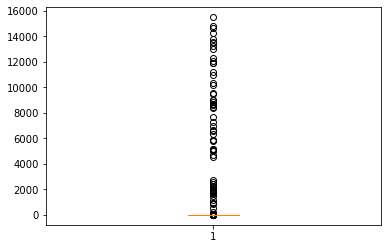

In [61]:
plt.boxplot(train_data.power)
Q1 = train_data.power.quantile(0.00)
Q3 = train_data.power.quantile(0.99)
IQR = Q3 - Q1
train_data = train_data[(train_data.power >= Q1 ) & (train_data.power <= Q3 )]

We can see the difference in plot before reducing outliers and after reducing outliers. 

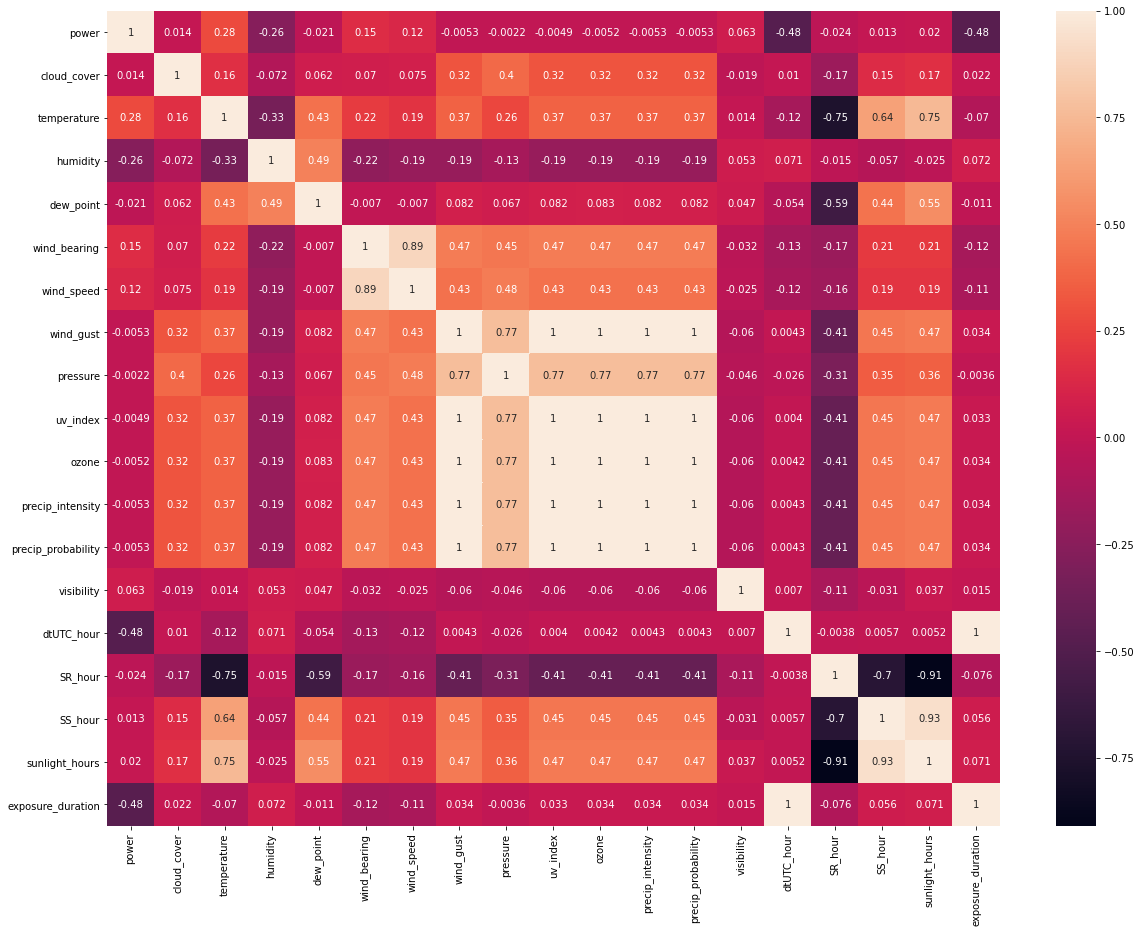

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

This graph states  that our target variable ‘power’ somewhat strongly correlates with ‘apparent_temperature

In [63]:
train_data.dtypes

power                 float64
cloud_cover           float64
temperature             int64
humidity                int64
dew_point             float64
wind_bearing            int64
wind_speed            float64
wind_gust             float64
pressure              float64
uv_index                int64
ozone                 float64
precip_intensity      float64
precip_probability    float64
visibility            float64
icon                   object
dtUTC_hour              int64
SR_hour                 int64
SS_hour                 int64
sunlight_hours          int64
exposure_duration       int64
dtype: object

Text(0, 0.5, 'Power')

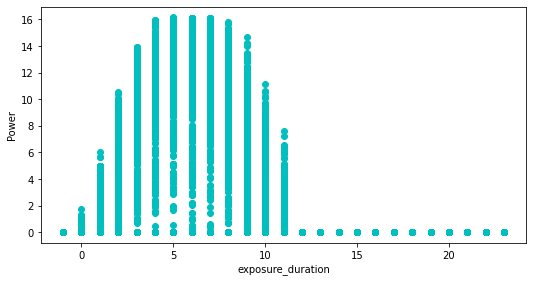

In [64]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,1)
plt.scatter(train_data['exposure_duration'] , train_data['power'],c='c')
plt.xlabel("exposure_duration",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

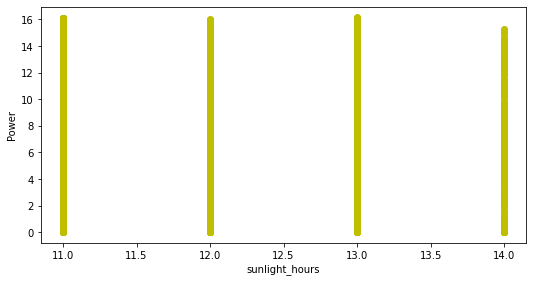

In [65]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,2)
plt.scatter(train_data['sunlight_hours'] , train_data['power'],c='y')
plt.xlabel("sunlight_hours",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

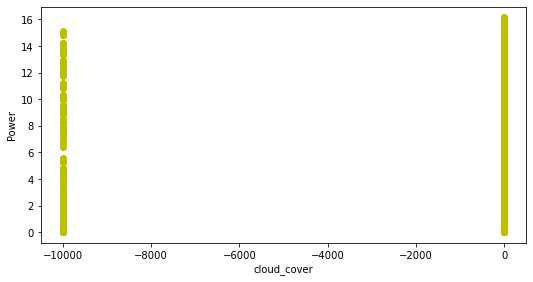

In [66]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,3)
plt.scatter(train_data['cloud_cover'] , train_data['power'] , c='y')
plt.xlabel('cloud_cover',fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

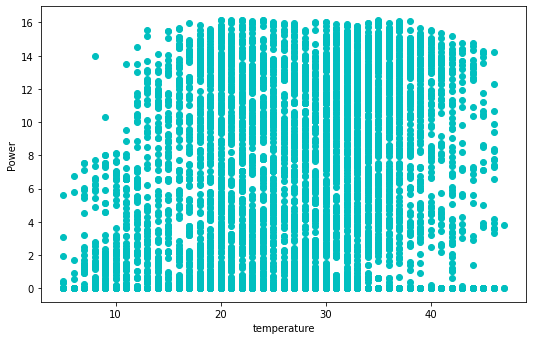

In [67]:
plt.figure(figsize=(40,25))
plt.subplot(4,4,4)
plt.scatter(train_data['temperature'] , train_data['power'], c='c')
plt.xlabel("temperature",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

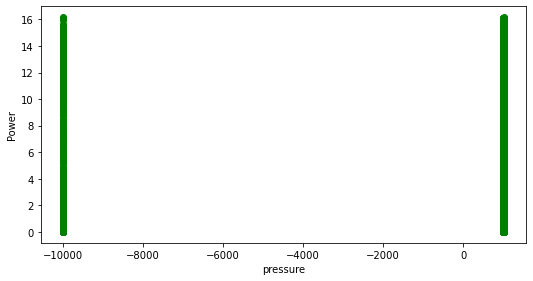

In [68]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,5)
plt.scatter(train_data['pressure'] , train_data['power'],c='g')
plt.xlabel("pressure",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

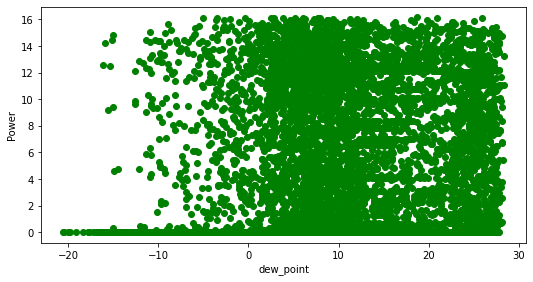

In [69]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,6)
plt.scatter(train_data['dew_point'] , train_data['power'],c='g')
plt.xlabel("dew_point",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

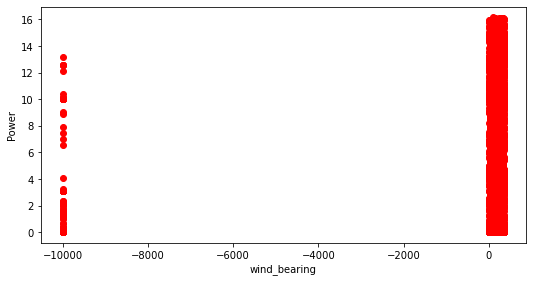

In [70]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,7)
plt.scatter(train_data['wind_bearing'] , train_data['power'],c='r')
plt.xlabel("wind_bearing",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

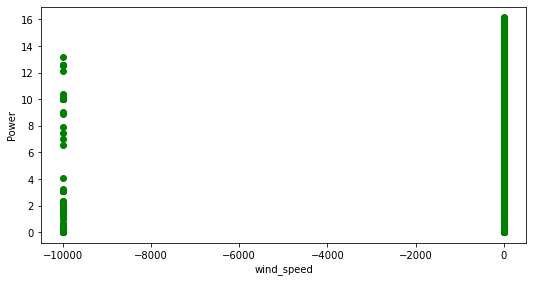

In [71]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,8)
plt.scatter(train_data['wind_speed'] , train_data['power'],c='g')
plt.xlabel("wind_speed",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

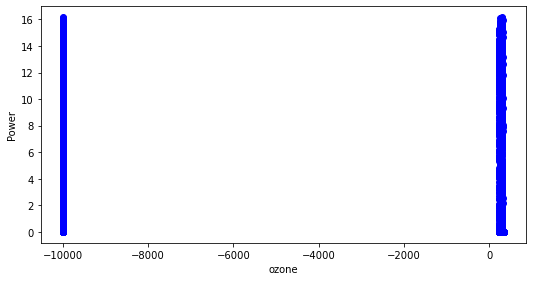

In [72]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,9)
plt.scatter(train_data['ozone'] , train_data['power'],c='b')
plt.xlabel("ozone",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

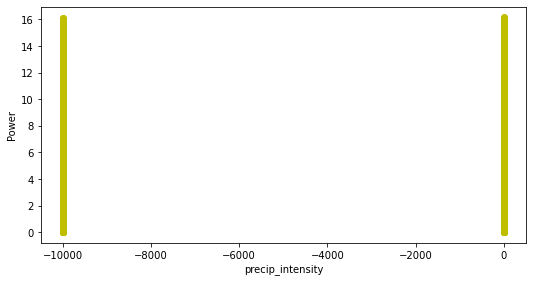

In [73]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,10)
plt.scatter(train_data['precip_intensity'] , train_data['power'] , c='y')
plt.xlabel('precip_intensity',fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

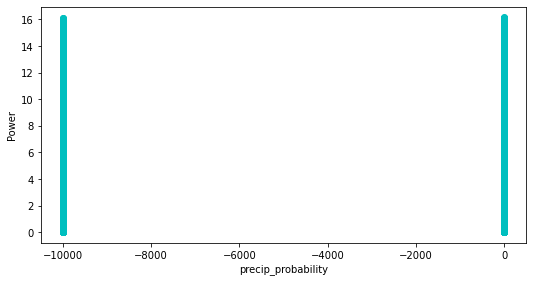

In [74]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,11)
plt.scatter(train_data['precip_probability'] , train_data['power'], c='c')
plt.xlabel("precip_probability",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

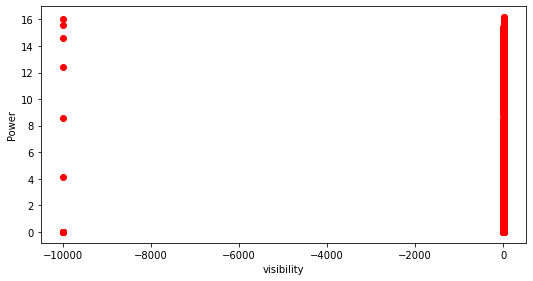

In [75]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,12)
plt.scatter(train_data['visibility'] , train_data['power'] ,c='r')
plt.xlabel("visibility",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

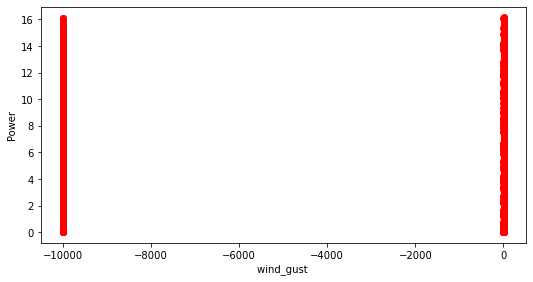

In [76]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,13)
plt.scatter(train_data['wind_gust'] , train_data['power'],c='r')
plt.xlabel("wind_gust ",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

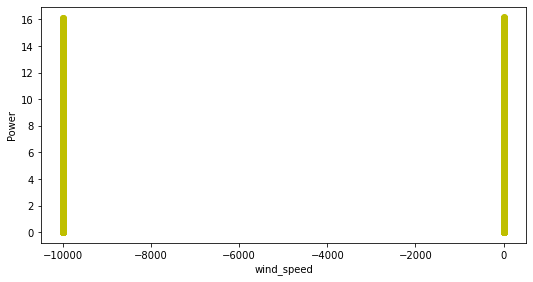

In [77]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,14)
plt.scatter(train_data['uv_index'] , train_data['power'],c='y')
plt.xlabel("wind_speed",fontsize=10)
plt.ylabel("Power",fontsize=10)

Text(0, 0.5, 'Power')

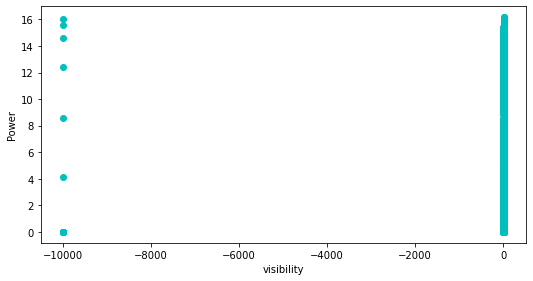

In [78]:
plt.figure(figsize=(40,20))
plt.subplot(4,4,15)
plt.scatter(train_data['visibility'] , train_data['power'],c='c')
plt.xlabel("visibility",fontsize=10)
plt.ylabel("Power",fontsize=10)

We can say from above plot that some of colums are having less correlating and level of power being generated on different weather characterstics.

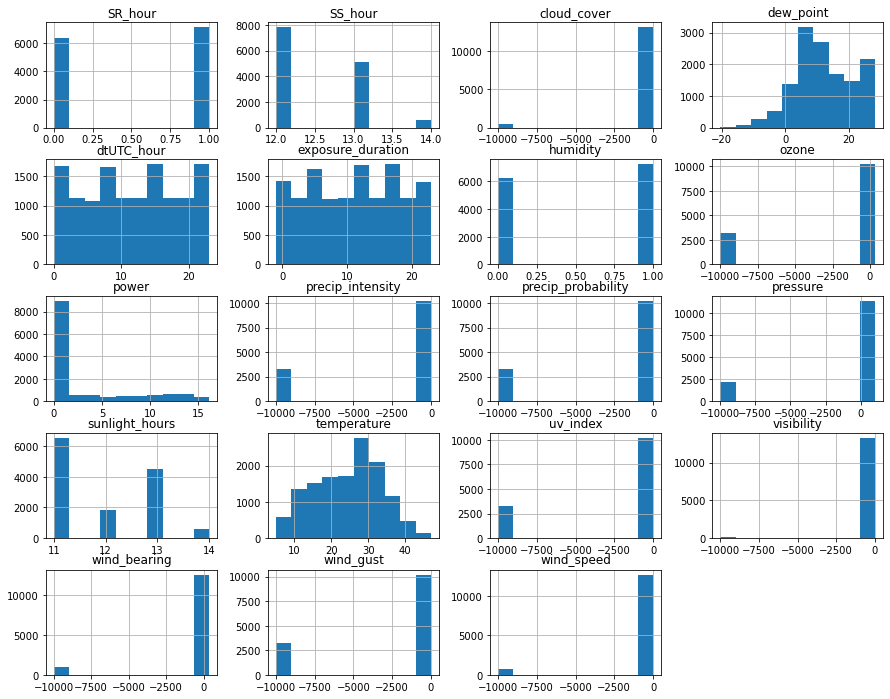

In [79]:
train_data.hist(figsize = (15,12))
plt.show()

We can see in above histogram that Maximum power is generated on sunlight light hours, Exposed hours, exposed duration.

##    Categorical Encoding of catagorical columns

In [80]:
ClimaticConditions = pd.get_dummies(train_data['icon'],drop_first=True)
train_data['icon'] = pd.factorize(train_data['icon'])[0]

<ipython-input-80-37de6a03352b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['icon'] = pd.factorize(train_data['icon'])[0]


In [81]:
train_data = pd.concat([train_data , ClimaticConditions ], axis=1)

In [82]:
weather_forecast.shape

(648, 18)

In [83]:
train_data.columns

Index(['power', 'cloud_cover', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility', 'icon',
       'dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours',
       'exposure_duration', 'clear-night', 'cloudy', 'fog',
       'partly-cloudy-day', 'partly-cloudy-night', 'rain', 'wind'],
      dtype='object')

In [84]:
train_data.shape

(13482, 27)

### Dropping the column for which dummy variables were created

In [85]:
train_data.drop(['icon'], axis=1, inplace=True)
train_data.columns

Index(['power', 'cloud_cover', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours',
       'exposure_duration', 'clear-night', 'cloudy', 'fog',
       'partly-cloudy-day', 'partly-cloudy-night', 'rain', 'wind'],
      dtype='object')

##  Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

numericals = ['power','cloud_cover','temperature','humidity','dew_point','wind_bearing','wind_speed','wind_gust',\
           'pressure','uv_index','ozone','precip_intensity','precip_probability','visibility','dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours','exposure_duration','sunlight_hours']

train_data[numericals] = scaler.fit_transform(train_data[numericals])

In [87]:
train_data.describe()

,power,cloud_cover,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,SS_hour,sunlight_hours,exposure_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
count,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,...,1.348200e+04,1.348200e+04,1.348200e+04,13482.000000,13482.000000,13482.000000,13482.000000,13482.000000,13482.000000,13482.000000
mean,1.254069e-15,3.004664e-14,-3.121829e-15,1.235921e-14,-1.246823e-15,-1.094453e-15,1.184658e-15,-1.340070e-14,8.831300e-15,5.474829e-14,...,-6.166689e-14,4.399264e-14,3.696461e-16,0.228082,0.095609,0.216437,0.127503,0.108144,0.005785,0.000148
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,...,1.000037e+00,1.000037e+00,1.000037e+00,0.419611,0.294065,0.411831,0.333548,0.310574,0.075845,0.012179
min,-6.307564e-01,-5.522680e+00,-2.196150e+00,-1.077461e+00,-3.564514e+00,-3.694123e+00,-4.149568e+00,-1.770399e+00,-2.293259e+00,-1.770399e+00,...,-8.011596e-01,-9.394159e-01,-1.731144e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.307564e-01,1.809371e-01,-8.415144e-01,-1.077461e+00,-6.559904e-01,2.271404e-01,2.405429e-01,5.641148e-01,4.334948e-01,5.644198e-01,...,-8.011596e-01,-9.394159e-01,-8.675415e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.307564e-01,1.809371e-01,6.157586e-02,9.281074e-01,-1.305656e-01,2.547686e-01,2.408853e-01,5.645677e-01,4.355180e-01,5.644198e-01,...,-8.011596e-01,6.345092e-02,-3.939440e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.780241e-01,1.811653e-01,7.388936e-01,9.281074e-01,8.419650e-01,3.108034e-01,2.412891e-01,5.649459e-01,4.374544e-01,5.648868e-01,...,9.193300e-01,1.066318e+00,8.596626e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.687372e+00,1.815075e-01,2.545074e+00,9.281074e-01,1.811748e+00,3.364859e-01,2.441074e-01,5.673924e-01,4.401693e-01,5.672219e-01,...,2.639820e+00,2.069185e+00,1.723265e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


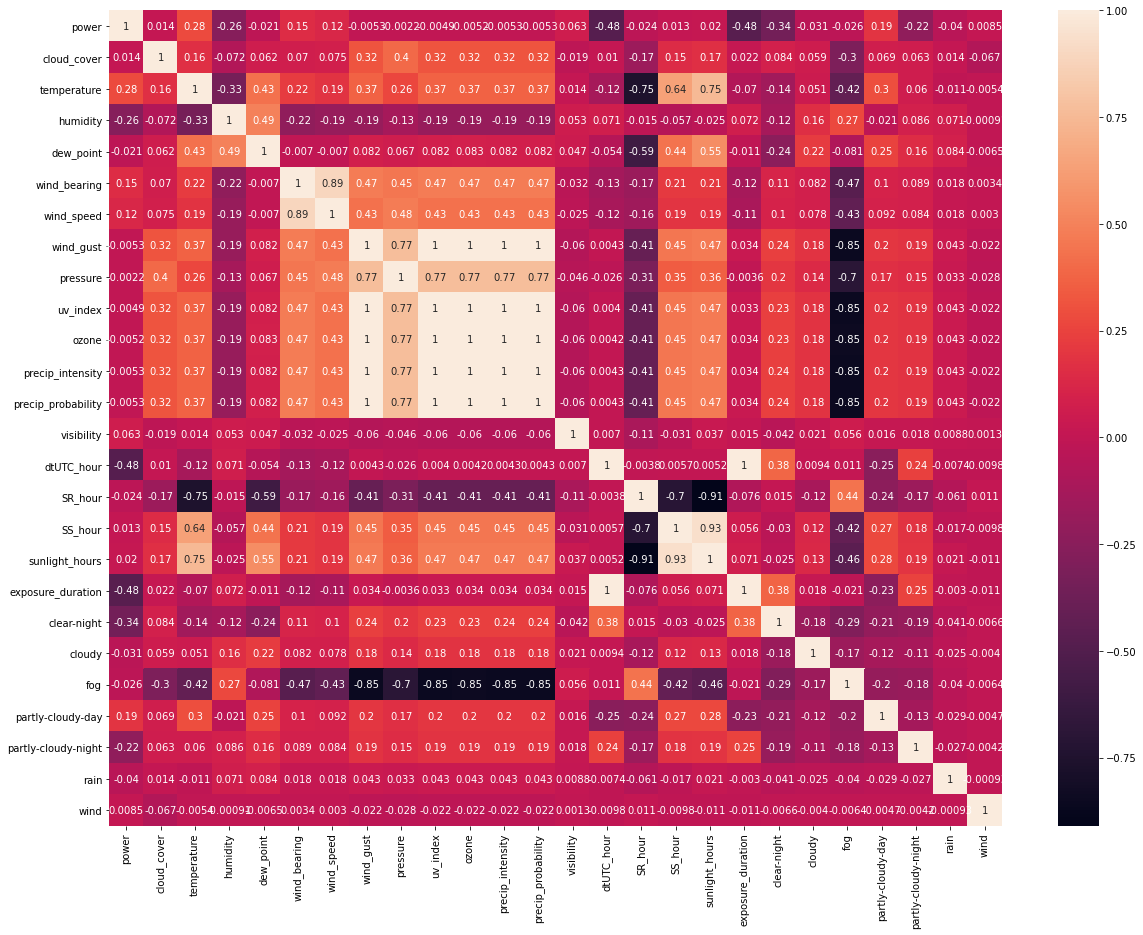

In [88]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

# Splitting Of Dataset  into Predictors(X) and Target(Y) variables

In [89]:
Y = train_data.pop('power')
X = train_data

In [90]:
Y

0       -0.630756
1       -0.630756
2       -0.630756
3       -0.630756
4       -0.630756
           ...   
13614   -0.630756
13615   -0.630756
13616   -0.630756
13617   -0.630756
13618   -0.630756
Name: power, Length: 13482, dtype: float64

In [91]:
X

,cloud_cover,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,SS_hour,sunlight_hours,exposure_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,0.180937,0.174462,0.928107,0.834545,0.316640,0.240200,-1.770399,0.435758,-1.770399,-1.770391,...,-0.80116,0.063451,1.003596,1,0,0,0,0,0,0
1,0.180937,0.287348,0.928107,0.900498,-3.694123,-4.149568,-1.770399,-2.293259,-1.770399,-1.770391,...,-0.80116,0.063451,1.147530,0,0,1,0,0,0,0
2,0.180937,0.174462,0.928107,0.890605,-3.694123,-4.149568,-1.770399,-2.293259,-1.770399,-1.770391,...,-0.80116,0.063451,1.291464,0,0,1,0,0,0,0
3,0.180937,-0.164197,0.928107,0.746608,0.301853,0.240034,-1.770399,0.435813,-1.770399,-1.770391,...,-0.80116,0.063451,1.435397,1,0,0,0,0,0,0
4,0.180937,-0.051310,0.928107,0.656472,-3.694123,-4.149568,-1.770399,-2.293259,-1.770399,-1.770391,...,-0.80116,0.063451,1.579331,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,0.181028,0.513121,0.928107,1.024710,0.212353,0.241030,0.564927,0.435644,0.564420,0.563748,...,-0.80116,0.063451,0.283928,0,0,0,0,1,0,0
13615,0.181028,0.400235,0.928107,1.042297,0.219747,0.241258,0.565128,0.435845,0.564420,0.563543,...,-0.80116,0.063451,0.427862,0,0,0,0,1,0,0
13616,0.181040,0.287348,0.928107,1.070877,0.226362,0.241302,0.565217,0.435944,0.564420,0.563475,...,-0.80116,0.063451,0.571795,0,0,0,0,1,0,0
13617,0.181108,0.287348,0.928107,1.112647,0.231032,0.241250,0.565193,0.435972,0.564420,0.563543,...,-0.80116,0.063451,0.715729,0,0,0,0,1,0,0


In [92]:
X.shape

(13482, 25)

In [93]:
Y.shape

(13482,)

In [94]:
# Split the dtaset into train and test
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [99]:
X_train.shape

(10785, 25)

In [100]:
Y_train.shape

(10785,)

In [101]:
X_test.shape

(2697, 25)

In [102]:
Y_test.shape

(2697,)

## Model  Building 

In [103]:
from sklearn.ensemble import RandomForestRegressor  # Import regressor

In [104]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 0) 
RF.fit(X_train, Y_train)                                        # fit the regressor with x and y data 

RandomForestRegressor(random_state=0)

## Model Evaluation

In [105]:
from sklearn import metrics
from sklearn.metrics import r2_score
## predictions
y_train_pred=RF.predict(X_train)
print('Variance for train data: ',r2_score(y_true=Y_train, y_pred=y_train_pred))
y_test_pred=RF.predict(X_test)
print('Variance for test data: ',r2_score(y_true=Y_test, y_pred=y_test_pred))

Variance for train data:  0.9765859959942749
Variance for test data:  0.8385003010493337


In [106]:
from sklearn.metrics import mean_squared_error

print('RMS for train data: ',np.sqrt(mean_squared_error(y_true = Y_train , y_pred = y_train_pred)))
print('RMS for test data ',np.sqrt(mean_squared_error(y_true = Y_test , y_pred = y_test_pred)))

RMS for train data:  0.15278846613135236
RMS for test data  0.4042313422994424


In [107]:
print('MAE train:', metrics.mean_absolute_error(y_true = Y_train , y_pred = y_train_pred))
print('MAE test:', metrics.mean_absolute_error(y_true = Y_test , y_pred = y_test_pred))

MAE train: 0.06793309691563705
MAE test: 0.1812895176314433


In [108]:
print('MSE train:', metrics.mean_squared_error(y_true = Y_train , y_pred = y_train_pred))
print('MSE test:', metrics.mean_squared_error(y_true = Y_test , y_pred = y_test_pred))

MSE train: 0.023344315382771402
MSE test: 0.16340297809720897


In [110]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, y_test_pred)))
# print("Precision is {0:.2f}".format(precision_score(Y_test, y_test_pred)))
# print("Recall is {0:.2f}".format(recall_score(Y_test, y_test_pred)))

In [111]:
# Getting ValueError: continuous is not supported

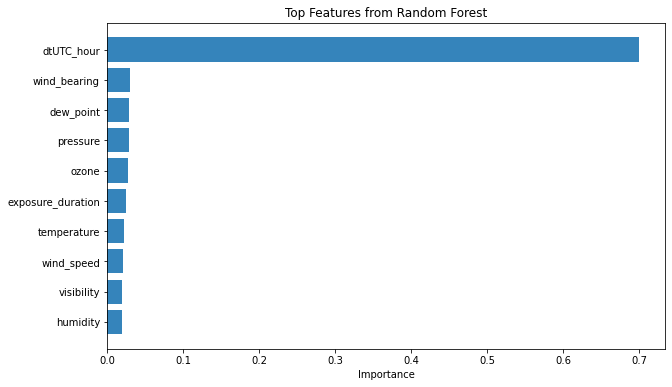

In [112]:
# Top most important features are:

features = X_train.columns
import_features = RF.feature_importances_
top_features = pd.DataFrame([f for f in zip (features, import_features)], columns = ["Feature","Importance"]).nlargest(10,"Importance")
top_features.sort_values(by = "Importance", inplace = True)
plt.figure(figsize=(10,6))
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)
plt.yticks(range(len(top_features)),top_features.Feature)
plt.xlabel('Importance')
plt.title('Top Features from Random Forest')
plt.show()

#  Analysis of Forecast Data

In [114]:
ClimateCond = pd.get_dummies(weather_forecast['icon'],drop_first=True)

In [115]:
weather_forecast = pd.concat([weather_forecast , ClimateCond ], axis=1)

In [117]:
weather_forecast.drop(['icon'], axis=1, inplace=True)

In [119]:
weather_forecast['cloud_cover'].unique()

array([0.35, 0.43, 0.48, 0.49, 0.51, 0.59, 0.66, 0.69, 0.77, 0.83, 0.78,
       0.7 , 0.61, 0.55, 0.24, 0.09, 0.06, 0.03, 0.  , 0.1 , 0.21, 0.23,
       0.2 , 0.16, 0.07, 0.04, 0.01, 0.14, 0.27, 0.45, 0.47, 0.53, 0.44,
       0.73, 0.75, 0.68, 0.62, 0.58, 0.31, 0.02, 0.15, 0.33, 0.91, 1.  ,
       0.87, 0.12, 0.22, 0.17, 0.74, 0.86, 0.81, 0.6 , 0.39, 0.19, 0.25,
       0.41, 0.54, 0.65, 0.72, 0.76, 0.84, 0.88, 0.95, 0.99, 0.98, 0.97,
       0.96, 0.9 , 0.92, 0.64, 0.67, 0.63, 0.52, 0.4 , 0.28, 0.05, 0.08,
       0.42, 0.32, 0.11, 0.94, 0.8 , 0.34, 0.18, 0.36, 0.13])

In [124]:
#Scaling the Numerical Values

scaler= StandardScaler()

numericals = ['cloud_cover', 'apparent_temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours']

weather_forecast[numericals] = scaler.fit_transform(weather_forecast[numericals])

In [125]:
weather_forecast.columns

Index(['cloud_cover', 'apparent_temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours', 'clear-night',
       'cloudy', 'partly-cloudy-day', 'partly-cloudy-night'],
      dtype='object')

In [126]:
weather_forecast.shape

(648, 21)

In [127]:
X_train.shape

(10785, 25)

In [131]:
test_forecast = weather_forecast

In [133]:
scaler= StandardScaler()

Forecast_num = ['cloudy','cloud_cover','apparent_temperature','humidity','dew_point','wind_bearing','wind_speed','wind_gust',\
           'pressure','uv_index','ozone','precip_intensity','precip_probability','visibility','dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours']

test_forecast[Forecast_num] = scaler.fit_transform(test_forecast[Forecast_num])

In [134]:
test_forecast.shape

(648, 21)

In [135]:
difference = set( X_train.columns ) - set( test_forecast.columns )

In [137]:
# we will Add a missing column in test set with default value equal to 0
for i in difference:
    weather_forecast[i] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_forecast = test_forecast[X_train.columns]

In [138]:
test_forecast.shape

(648, 25)

In [139]:
test_forecast.dtypes

cloud_cover            float64
temperature              int64
humidity               float64
dew_point              float64
wind_bearing           float64
wind_speed             float64
wind_gust              float64
pressure               float64
uv_index               float64
ozone                  float64
precip_intensity       float64
precip_probability     float64
visibility             float64
dtUTC_hour             float64
SR_hour                float64
SS_hour                float64
sunlight_hours         float64
exposure_duration        int64
clear-night              uint8
cloudy                 float64
fog                      int64
partly-cloudy-day        uint8
partly-cloudy-night      uint8
rain                     int64
wind                     int64
dtype: object

In [140]:
#RF.fit(Forecast_weather,0)   
Y_prediction=RF.predict(test_forecast)

In [141]:
print(Y_prediction)

[-6.30756372e-01 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01
 -6.30756372e-01 -6.30756372e-01 -4.01752142e-01 -3.33644276e-01
 -1.14146812e-01  4.43467092e-01  3.86139036e-01  5.32682853e-01
  3.68644945e-01  1.69783117e-01  4.32235557e-01  4.10881267e-01
  1.14528891e-01 -3.55080698e-01 -6.30756372e-01 -6.30756372e-01
 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01
 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01
 -6.30756372e-01 -6.30756372e-01 -4.02758258e-01 -4.05468610e-01
 -1.64719520e-01  3.94064763e-01  5.35865464e-01  3.62300256e-01
  2.64111587e-01  3.84722261e-01  3.79137293e-01  1.78016838e-01
  6.83502380e-02 -5.15504803e-01 -6.30756372e-01 -6.30756372e-01
 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01
 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01 -6.30756372e-01
 -6.30756372e-01 -6.30756372e-01 -4.02203867e-01 -3.61877112e-01
 -1.40778076e-01  4.65950696e-01  3.70595577e-01  2.16783088e-01
  2.22491254e-01  5.19480

In [142]:
Y_prediction.shape

(648,)

In [143]:
test_forecast['power_predicted'] = Y_prediction

In [144]:
test_forecast.columns

Index(['cloud_cover', 'temperature', 'humidity', 'dew_point', 'wind_bearing',
       'wind_speed', 'wind_gust', 'pressure', 'uv_index', 'ozone',
       'precip_intensity', 'precip_probability', 'visibility', 'dtUTC_hour',
       'SR_hour', 'SS_hour', 'sunlight_hours', 'exposure_duration',
       'clear-night', 'cloudy', 'fog', 'partly-cloudy-day',
       'partly-cloudy-night', 'rain', 'wind', 'power_predicted'],
      dtype='object')

In [145]:
weatherpred_num = ['cloud_cover', 'apparent_temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours',
       'exposure_duration', 'clear-night', 'cloudy', 'fog',
       'partly-cloudy-day', 'partly-cloudy-night', 'rain', 'wind',
       'power_predicted']

In [146]:
test_forecast['power_predicted'].values

array([-6.30756372e-01, -6.30756372e-01, -6.30756372e-01, -6.30756372e-01,
       -6.30756372e-01, -6.30756372e-01, -4.01752142e-01, -3.33644276e-01,
       -1.14146812e-01,  4.43467092e-01,  3.86139036e-01,  5.32682853e-01,
        3.68644945e-01,  1.69783117e-01,  4.32235557e-01,  4.10881267e-01,
        1.14528891e-01, -3.55080698e-01, -6.30756372e-01, -6.30756372e-01,
       -6.30756372e-01, -6.30756372e-01, -6.30756372e-01, -6.30756372e-01,
       -6.30756372e-01, -6.30756372e-01, -6.30756372e-01, -6.30756372e-01,
       -6.30756372e-01, -6.30756372e-01, -4.02758258e-01, -4.05468610e-01,
       -1.64719520e-01,  3.94064763e-01,  5.35865464e-01,  3.62300256e-01,
        2.64111587e-01,  3.84722261e-01,  3.79137293e-01,  1.78016838e-01,
        6.83502380e-02, -5.15504803e-01, -6.30756372e-01, -6.30756372e-01,
       -6.30756372e-01, -6.30756372e-01, -6.30756372e-01, -6.30756372e-01,
       -6.30756372e-01, -6.30756372e-01, -6.30756372e-01, -6.30756372e-01,
       -6.30756372e-01, -

In [147]:
# To understand refer below graphs

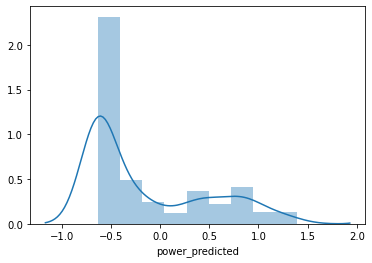

In [148]:
sns.distplot(test_forecast['power_predicted'], hist= True)